In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

Poissonova uloha - uloha kde hledam jake jsou f- ni hodnoty v oblasti, takove aby platilo ze divergence te f-ce = nejake hodnote(konstante) (= gradient ^2)

Laplasova - Poissonova uloha kde ta hodnota(konstanta) = 0

Dirichletův uloha (D-ove okrajove podminky) pro laplaceovu rovnici je najít funkci U(x, y), která splňuje Laplaceovu rovnici Uxx + Uyy = 0 uvnitř určité oblasti a přijímá dané hodnoty na hranici této oblasti. (ktere jsou definovane)

V zjednodusene formulaci Laplasva r-ce vypada: 1/4 ( Ui+1,y + Ui-1,y + Ui,y-1, Ui,j+1)     (prumena hodnota z sousedu)

Priklad pouziti: V úkolech stacionární tepelné vodivosti Laplaceova rovnice popisuje rozložení teploty uvnitř objektu bez zdrojů tepla.

Determinesticke reseni - prez sousedy

In [4]:
vyska = 30
sirka = 40

hranice = { 'vrchol' : 50, 'dolni' : 10, 'levy' : 10, 'pravy' : 50}

matice = [vyska, sirka]
matice = np.full((vyska, sirka), 0.1)
matice[-1] =  hranice['vrchol'] # prehozeny pro contourf
matice[0] =  hranice['dolni']
matice[:, 0] =  hranice['levy']
matice[:, -1] =  hranice['pravy']

pocet_iteraci = 5000

for i in range(pocet_iteraci):
    for y in range(1, vyska - 1):
        for x in range(1, sirka - 1):
            matice[y,x] = 1/4 * (matice[y - 1, x] + matice[y + 1, x] + matice[y, x - 1] + matice[y, x + 1])

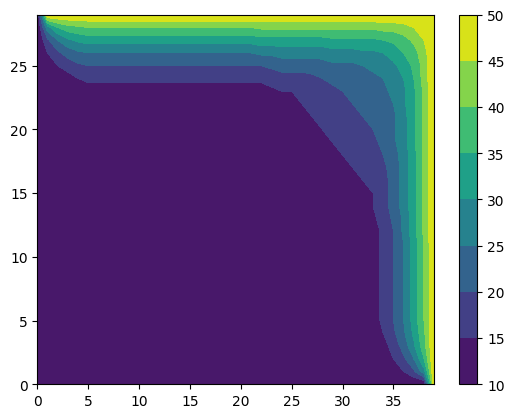

In [56]:
plt.contourf(matice)
plt.colorbar()
plt.show()

Metodou bloudeni MC- vyhodna kdyz hledame : konkretni prostor nebo bod, ale potrebujeme hodne kroku pro presnejsi vypocet

Muzeme vybirat pixel nahodne a udelat tolik nahodnych vyberu pixelu aby kazdy mel sanci byt vybran. Ale zpusobem postupny, ujistime ze kazdy pixel bude vybran jestli pujdeme postupne.

In [96]:
import random
vyska = 30
sirka = 40

hranice = { 'vrchol' : 50, 'dolni' : 10, 'levy' : 10, 'pravy' : 50}

matice = np.zeros((vyska, sirka))
matice[-1] =  hranice['vrchol']
matice[0] =  hranice['dolni']
matice[:, 0] =  hranice['levy']
matice[:, -1] =  hranice['pravy']

posunuti = {"vlevo": lambda y,x :(y,x-1), 
            "vpravo": lambda y,x :(y, x+1), 
            "dolu": lambda y,x :(y-1, x), 
            "nahoru": lambda y,x :(y+1, x)}

volba = ("vlevo", "vpravo", "dolu", "nahoru")

pocet_iteraci_na_pixel = 5000

for y in range(1, vyska - 1):
    for x in range(1, sirka - 1):
        prumerna_hod_pix = int(matice[y, x])
        for krok in range(pocet_iteraci_na_pixel):
            novy_y, novy_x = y,x
            while True:
                posun = random.choice(volba)
                novy_y, novy_x = posunuti[posun](novy_y, novy_x)
                if novy_y == 0 or novy_y == vyska-1 or novy_x == 0 or novy_x == sirka-1:
                    prumerna_hod_pix += int(matice[novy_y, novy_x])
                    break
        prumerna_hod_pix /= pocet_iteraci_na_pixel
        matice[y, x] = prumerna_hod_pix
            

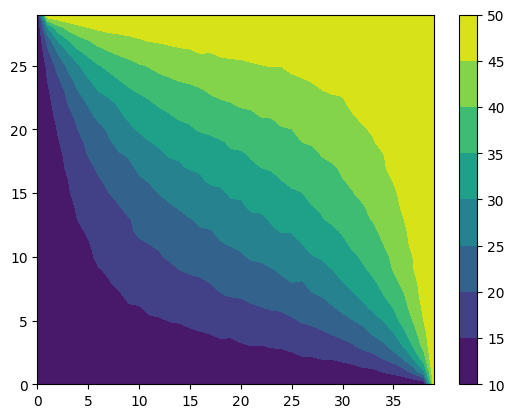

: 

In [97]:
plt.contourf(matice)
plt.colorbar()
plt.show()